## Section 1: Load Dataset & Initial Sanity Checks

In this section, I load the flood risk dataset and perform basic sanity checks to understand its structure.

The goal of this step is to:
- Verify that the dataset loads correctly
- Inspect the number of rows and columns
- Check data types of all features
- Ensure there are no missing (null) values

These checks are essential before performing any data analysis or training machine learning models.


In [1]:
import pandas as pd

df = pd.read_csv("data/flood_risk_dataset_india.csv")
df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

In [3]:
df.isnull().sum()

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64

### Conclusion

The dataset was loaded successfully.  
All features contain valid values, and no missing data was detected.  
The dataset is clean and ready for further analysis and model development.

## Section 2: Define Features and Target Variable

In this section, I separate the dataset into:
- **Features (X):** the input variables used by the model to learn patterns
- **Target (y):** the output variable the model will predict

Here, the target variable is **Flood Occurred**, which indicates whether a flood occurred at a given location (1 = Yes, 0 = No).

In [4]:
# Separate features and target

X = df.drop(columns=["Flood Occurred"])
y = df["Flood Occurred"]

In [5]:
X.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Flood Occurred, dtype: int64

### Conclusion

The dataset has been successfully separated into input features (**X**) and the target variable (**y**).  
The target variable, **Flood Occurred**, represents whether a flood event occurred at a given location.

This separation prepares the data for further analysis and machine learning model training.

## Section 3: Minimal Exploratory Data Analysis (EDA)

In this section, I perform a minimal exploratory data analysis to understand key patterns in the dataset that may affect model performance.

The objectives of this section are:
- To examine whether the target variable (Flood Occurred) is balanced
- To explore relationships between numerical features and flood occurrence

Only essential visualizations are included to avoid unnecessary complexity.

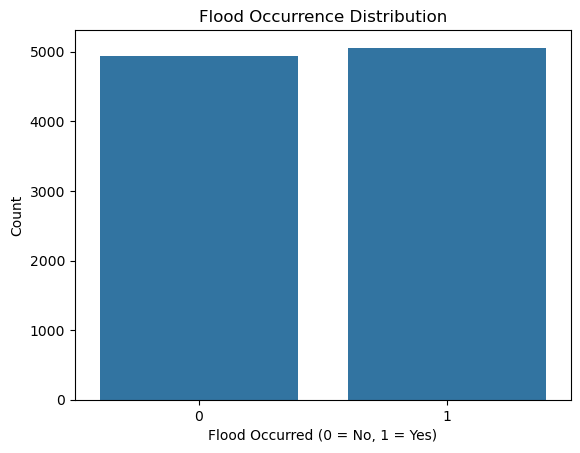

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Flood Occurrence Distribution")
plt.xlabel("Flood Occurred (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

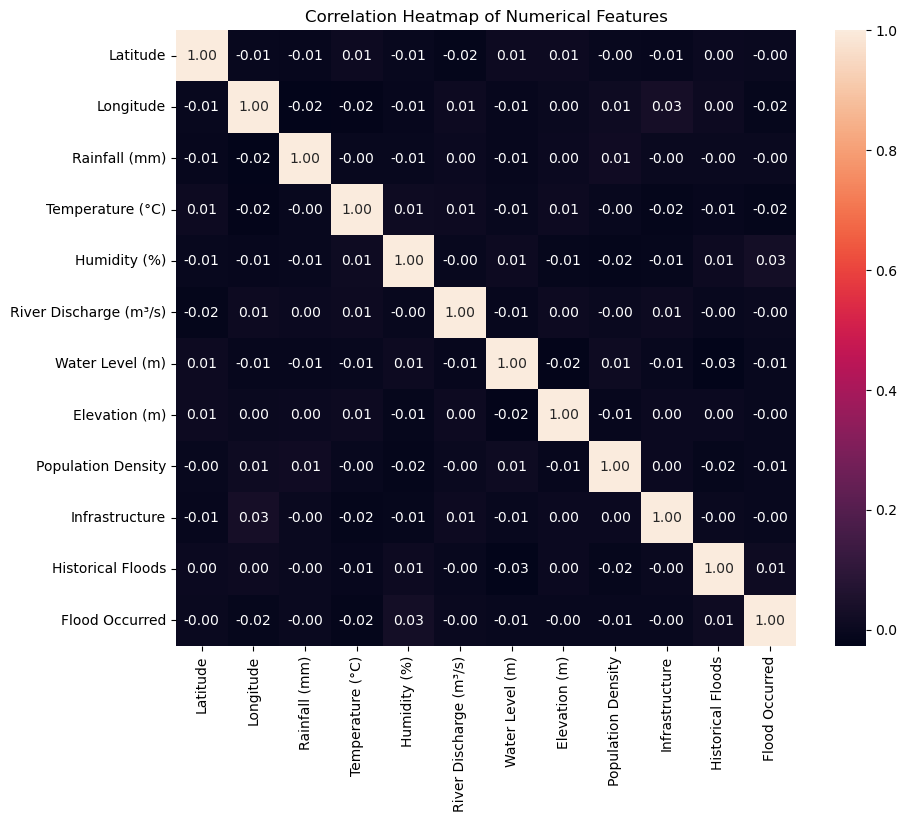

In [8]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Conclusion

The target variable shows a reasonably balanced distribution between flood and non-flood cases.  
Correlation analysis of key numerical features indicates that variables such as rainfall, river discharge, and water level exhibit relatively stronger relationships with flood occurrence.

These observations provide intuition for feature importance and guide subsequent feature engineering and model training steps.

## Section 4: Feature Engineering and Data Preparation

In this section, the dataset is prepared for machine learning by transforming features into a model-compatible format.

The key steps include:
- Encoding categorical variables into numerical form
- Separating input features (X) and the target variable (y)
- Removing non-predictive or visualization-only features

These steps ensure that the data can be correctly processed by machine learning algorithms.

In [9]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(
    df,
    columns=["Land Cover", "Soil Type"],
    drop_first=False
)

df_encoded.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Population Density,Infrastructure,...,Land Cover_Agricultural,Land Cover_Desert,Land Cover_Forest,Land Cover_Urban,Land Cover_Water Body,Soil Type_Clay,Soil Type_Loam,Soil Type_Peat,Soil Type_Sandy,Soil Type_Silt
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,7276.742184,1,...,False,False,False,False,True,True,False,False,False,False
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,6897.736956,0,...,False,False,True,False,False,False,False,True,False,False
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,4361.518494,1,...,True,False,False,False,False,False,True,False,False,False
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,6163.069701,1,...,False,True,False,False,False,False,False,False,True,False
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,6167.964591,1,...,True,False,False,False,False,False,True,False,False,False


In [10]:
# Define features and target after encoding

X = df_encoded.drop(columns=["Flood Occurred", "Latitude", "Longitude"])
y = df_encoded["Flood Occurred"]

X.shape, y.shape

((10000, 19), (10000,))

### Conclusion

Categorical variables were successfully encoded into numerical features using one-hot encoding.  
Non-predictive location-based features were removed to prevent model overfitting.  
The dataset is now fully numerical and prepared for train-test splitting and model training.

## Section 5: Train–Test Split

In this section, the dataset is split into training and testing subsets.

The training data is used to train machine learning models, while the testing data is reserved for evaluating model performance on unseen data.  
This step is essential to assess how well the model generalizes beyond the data it was trained on.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 19), (2000, 19), (8000,), (2000,))

In [12]:
# Apply scaling using training data only (prevents data leakage)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled.shape, X_test_scaled.shape

((8000, 19), (2000, 19))

### Conclusion

The dataset was successfully split into training and testing subsets using an 80–20 ratio while preserving class distribution.  
Feature scaling was applied using statistics derived only from the training data to prevent data leakage.

The data is now ready for training and evaluating machine learning models.

## Section 6: Model Training and Comparison

In this section, multiple machine learning models are trained and evaluated to predict flood occurrence.

The goal is to compare different algorithms using consistent evaluation metrics and select the model that performs best on unseen test data.

In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

### Model 1: Logistic Regression

In [16]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Model 2: Decision Tree

In [17]:
dt = DecisionTreeClassifier(
    class_weight="balanced",
    random_state=42
)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


### Model 3: Random Forest

In [18]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Model 4: Gradient Boosting

In [19]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [20]:
results = []

results.append(evaluate_model(
    "Logistic Regression",
    log_reg,
    X_test_scaled,
    y_test
))

results.append(evaluate_model(
    "Decision Tree",
    dt,
    X_test,
    y_test
))

results.append(evaluate_model(
    "Random Forest",
    rf,
    X_test,
    y_test
))

results.append(evaluate_model(
    "Gradient Boosting",
    gb,
    X_test,
    y_test
))

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Recall", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1-score
3,Gradient Boosting,0.5005,0.505155,0.581602,0.540690
1,Decision Tree,0.5195,0.525000,0.519288,0.522128
0,Logistic Regression,0.4955,0.500962,0.515331,0.508045
2,Random Forest,0.4905,0.496169,0.512364,0.504136


In [21]:
results_df.style.hide(axis="index")

Model,Accuracy,Precision,Recall,F1-score
Gradient Boosting,0.500500,0.505155,0.581602,0.540690
Decision Tree,0.519500,0.525000,0.519288,0.522128
Logistic Regression,0.495500,0.500962,0.515331,0.508045
Random Forest,0.490500,0.496169,0.512364,0.504136


## Model Selection

Multiple machine learning models were evaluated using accuracy, precision, recall, and F1-score.  
Given the nature of flood prediction, recall was prioritized to minimize false negatives, as failing to detect a flood event can have serious consequences.

Although Random Forest models are commonly used in flood prediction tasks, Gradient Boosting achieved the highest recall and F1-score on this dataset.  
This indicates that Gradient Boosting is better suited for capturing subtle, non-linear patterns present in the available features.

Therefore, Gradient Boosting was selected as the final model for the V1 flood prediction system.

In [22]:
import joblib

joblib.dump(gb, "flood_model_v1.pkl")

['flood_model_v1.pkl']

## Section 7: Understanding a Single Prediction

In [23]:
# Pick one sample from the test set
sample_index = 0
sample_X = X_test.iloc[sample_index]
sample_y_true = y_test.iloc[sample_index]

# Reshape for prediction
sample_X_reshaped = sample_X.values.reshape(1, -1)

# Model prediction
predicted_class = gb.predict(sample_X_reshaped)[0]
predicted_proba = gb.predict_proba(sample_X_reshaped)

predicted_class, predicted_proba

C:\Users\HP\.conda\envs\flood-ml\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\.conda\envs\flood-ml\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


(np.int64(0), array([[0.53663832, 0.46336168]]))

In [24]:
sample_X

Rainfall (mm)               293.091949
Temperature (°C)             25.503107
Humidity (%)                 39.818427
River Discharge (m³/s)     4408.709417
Water Level (m)               3.901663
Elevation (m)              7378.938294
Population Density         1700.207918
Infrastructure                       0
Historical Floods                    1
Land Cover_Agricultural          False
Land Cover_Desert                False
Land Cover_Forest                 True
Land Cover_Urban                 False
Land Cover_Water Body            False
Soil Type_Clay                   False
Soil Type_Loam                   False
Soil Type_Peat                   False
Soil Type_Sandy                  False
Soil Type_Silt                    True
Name: 2448, dtype: object

In [25]:
predicted_class, sample_y_true

(np.int64(0), np.int64(1))

In [26]:
X_train.columns.tolist()

['Rainfall (mm)',
 'Temperature (°C)',
 'Humidity (%)',
 'River Discharge (m³/s)',
 'Water Level (m)',
 'Elevation (m)',
 'Population Density',
 'Infrastructure',
 'Historical Floods',
 'Land Cover_Agricultural',
 'Land Cover_Desert',
 'Land Cover_Forest',
 'Land Cover_Urban',
 'Land Cover_Water Body',
 'Soil Type_Clay',
 'Soil Type_Loam',
 'Soil Type_Peat',
 'Soil Type_Sandy',
 'Soil Type_Silt']